# Анализ данных авиакомпании

Мы - аналитики российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У нас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

# 1. Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Шаг 1.1.
Проанализируем файл с моделями самолётов.

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Типы данных корректны, пропусков нет.

In [4]:
models = models.set_index('model')

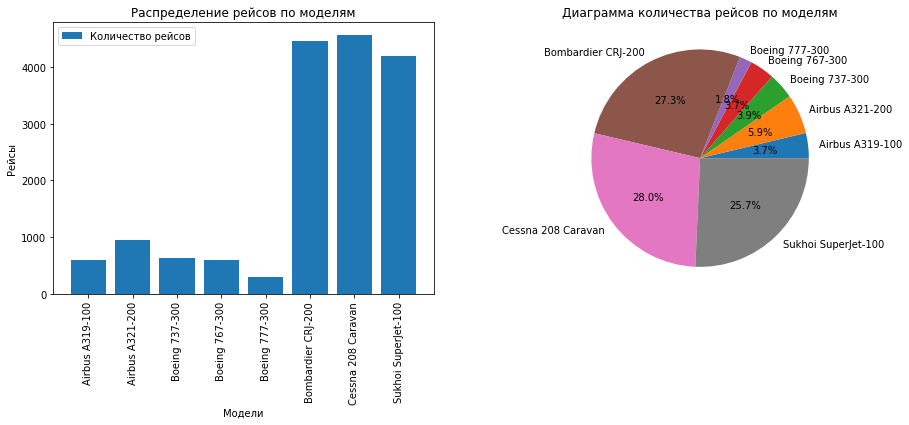

In [5]:
# построим распределение количества рейсов в зависимости от модели самолёта.
fig = plt.figure(figsize=(15, 5))
area = fig.add_subplot(1, 2, 1)
plt.bar(models.index, models['flights_amount'])
plt.xticks(rotation=90)
plt.xlabel('Модели')
plt.ylabel('Рейсы')
plt.title('Распределение рейсов по моделям')
plt.legend(['Количество рейсов'])

area = fig.add_subplot(1, 2, 2)
models['flights_amount'].plot.pie(labels=models.index, autopct='%1.1f%%')
plt.title('Диаграмма количества рейсов по моделям')
plt.ylabel('')
plt.xlabel('')
plt.show()

Как мы видим, большая часть рейсов приходится на Sukhoi SuperJet-100, Bombardier CRJ-200 и Cessna 208 Caravan.

#### Шаг 1.2.
Проанализируем файл с городами рейсов.

In [6]:
cities = pd.read_csv('/datasets/query_3.csv')
cities.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [7]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных корректны, пропусков нет.

In [8]:
cities = cities.set_index('city')

In [9]:
cities_10 = cities.sort_values(by='average_flights', ascending=False).head(10)
cities_10

,average_flights
city,
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645
Екатеринбург,11.322581
Ростов-на-Дону,10.193548
Пермь,10.129032
Брянск,10.000000
Сочи,9.612903


10 самых популярных городов получены.

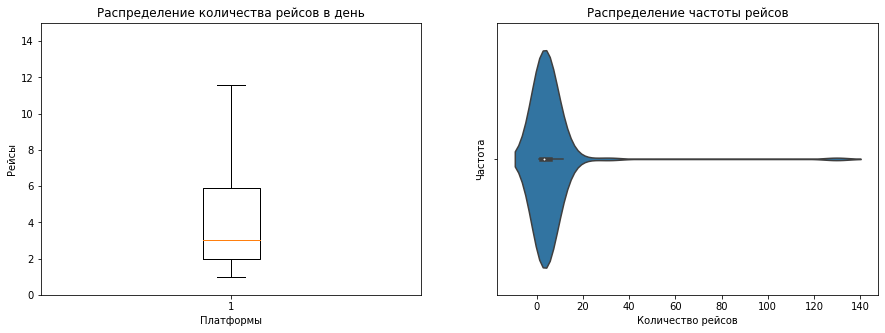

In [10]:
# построим распределение рейсов по всем городам.
fig = plt.figure(figsize=(15, 5))
area = fig.add_subplot(1, 2, 1)
plt.boxplot(cities['average_flights'])
plt.xlabel('Платформы')
plt.ylabel('Рейсы')
plt.title('Распределение количества рейсов в день')
plt.ylim(0, 15)

area = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(cities)
ax.set_ylabel('Частота')
ax.set_xlabel('Количество рейсов')
ax.set_title('Распределение частоты рейсов')
plt.show()

Как мы видим, в большей части городов происходит от 2 до 6 рейсов в день. Медиана - 3. Москва и Санкт-Петербург - 2 выброса. 

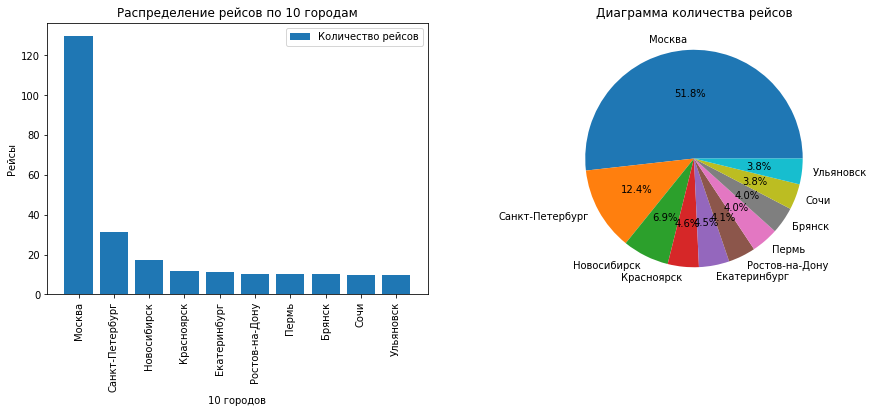

In [11]:
# построим распределение рейсов среди топ-10 городов
fig = plt.figure(figsize=(15, 5))
area = fig.add_subplot(1, 2, 1)
plt.bar(cities_10.index, cities_10['average_flights'])
plt.xticks(rotation=90)
plt.xlabel('10 городов')
plt.ylabel('Рейсы')
plt.title('Распределение рейсов по 10 городам')
plt.legend(['Количество рейсов'])

area = fig.add_subplot(1, 2, 2)
cities_10['average_flights'].plot.pie(labels=cities_10.index, autopct='%1.1f%%')
plt.title('Диаграмма количества рейсов')
plt.ylabel('')
plt.xlabel('')
plt.show()

Как мы видим, на Москву приходится больше половины рейсов в 10 самых загруженных городах.

# 2. Проверка гипотезы

In [12]:
fests = pd.read_csv('/datasets/query_last.csv')
fests.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [13]:
fests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [14]:
fests = fests.fillna(0)
fests.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,0.0,0
3,33,51378,0.0,0
4,34,51492,0.0,0


In [15]:
fest_tickets = fests[fests['festival_week']==0]['ticket_amount']
non_fest_tickets = fests[fests['festival_week']!=0]['ticket_amount']

Сформулируем нулевую гипотезу - количество продаж билетов на фестивальные недели не отличается от аналогичного показателя для обычных недель.

Пороговое значение alpha выберем стандартное, равное 0.05.

In [16]:
print("p-значение составило: {0:.3f}".format(stats.mannwhitneyu(fest_tickets, non_fest_tickets, alternative='two-sided')[1]))

p-значение составило: 0.068


Как видим, p-value выше порогового значения и, казалось бы, нулевую гипотезу стоит отбросить. Однако, в нашей выборке всего 10 значений (7 против 3), поэтому сделать пригодный для бизнес-решения вывод, опираясь только на эти данные, мы не можем.

#### Общий вывод.

Мы построили распределение рейсов по моделям самолётов и городам и выяснили, что:

- большая часть рейсов приходится на Sukhoi SuperJet-100, Bombardier CRJ-200 и Cessna 208 Caravan;
- в большей части городов происходит от 2 до 6 рейсов в день. Медиана - 3. Москва и Санкт-Петербург - 2 выброса (130 и 31 рейс в день соответственно); 
- топ-10 городов по количеству рейсов: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск;
- среди 10 самых загруженных городов больше половины рейсов приходится на Москву (51,8 %), также значительная доля у Санкт-Петербурга (12,4 %).

Также мы выяснили, что спрос на билеты во время фестивалей может отличаться от спроса в обычное время, но для твердого вывода нам необходимо больше данных.